# Исследование продаж компьютерных игр

Описание проекта:
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Перед нами данные до 2016 года. Нужно отработать принцип работы с данными.

В данном иследование я проверю данные на ошибки и исправлю их при необходимости, затем проведу статистические исследования и выявлю характерные признаки поведения пользователей, в завершающей части проверю несколько гипотез о равенстве признаков.

## Изучение исходных данных

In [1]:
#Импортируем необходимые для проекта библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
#Установим по умолчанию следующий стиль графиков:
plt.style.use ('seaborn-bright')

In [3]:
#Извлечем из источника таблицу с данными, и сохраним в переменную df
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# общая информация о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В таблице 11 столбцов. Согласно документации к данным:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales —` продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales —` продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации `ESRB` (англ. `Entertainment Software Rating Board`).Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод

1. В датасете есть пропуски в столбцах:
- `Name`;
- `Year_of_Release`;
- `Critic_Score`;
- `User_Score `;
- `Rating`;
2. Наименования столбцов не соответсвуют "змениному регистру", необходимо привести к нижнему регистру.
3. Неверный тип данных у года релиза `Year_of_Release` должен быть`int`.
4. Неверный тип данных у оценки пользователей  `User_Score` должен быть`float64`.


## Предобработка данных

### Стиль заголовков

In [6]:
df.columns = df.columns.str.lower() # приведем все названия столбцов к нижнему регистру
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Типы данных

#### `year_of_releas` 

Для изменения типа данных у у года релиза `year_of_releas` необходимо сначал заполнить пропуски в этом столбце или удалить строки с пропусками.

In [7]:
#посмотрим сколько всего пропусков в каждом столбце в %
(df.isna().sum()/df.shape[0])*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [8]:
#df.dropna(subset = ['year_of_release'], inplace = True)
#df['year_of_release'] = df['year_of_release'].astype('int')
#df.info()

In [9]:
#Изучим строки с играми без даты релиза
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Строк с пропуском информации о годе выпуска игр  - 1,6%. 
Визуально у некоторых игр есть в наименовании год, но по результатам поиска в интернете нескольких таких игр, выяснила что год релиза не совпадает с этой цифрой.
Например, игры "Madden NFL 2004" и "FIFA Soccer 2004" вышли в 2003 году.

Т.к. процент пропуска мал - удалим эти строки.

In [10]:
f'Количество строк до удаления строк с пропусками даты релиза: {df.shape[0]}'

'Количество строк до удаления строк с пропусками даты релиза: 16715'

In [11]:
df.dropna(subset = ['year_of_release'], inplace = True)
f'Количество строк после удаления строк с пропусками даты релиза: {df.shape[0]}'

'Количество строк после удаления строк с пропусками даты релиза: 16446'

#### `user_score` 

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

У данного столбца тип - object, т.к. встречается значение `tbd`. Это означает  'To Be Determined' или 'Будет определено'. Для игр с такой отметкой пользовательская оценка еще не посчитана. Заменим на Nan. 

In [13]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [14]:
#Теперь можно изменить тип данных
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Пропуски значений

#### `name`

Посмотрим на строки с пропуском названий игр. Причиной пропуска может быть проблема с кодировкой названия.

In [15]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У данных строк также неизвестен жанр игры. Удалим эти строки.

In [16]:
f'Количество строк в датафрейме до удаления строк с пропусками наименования игр: {df.shape[0]}'

'Количество строк в датафрейме до удаления строк с пропусками наименования игр: 16446'

In [17]:
df.dropna(subset = ['name'], inplace = True)
df['genre'].isna().sum()

0

In [18]:
f'Количество строк в датафрейме после удаления строк с пропусками наименования игр: {df.shape[0]}'

'Количество строк в датафрейме после удаления строк с пропусками наименования игр: 16444'

#### `critic_score`

Как мы вяснили в п. 2.2.1 - в столбце `critic_score` пропущено 51% значений. Удаление половины датасета исказит данные. Оценку критиков не будем заполнять медианным значением, т.к. на основании этих данных не удастся сделать верные выводы о популярности игр.

Оставим в колонке значения Nan.

Предположим, что причина отсутсвия оценки критиков - старые игры не оценивали критики, не было для этого инструментов.

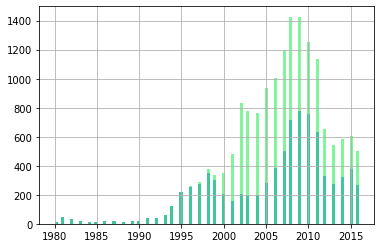

In [19]:
no_critic_score = df[df['critic_score'].isna()]
no_critic_score['year_of_release'].hist(bins=100, alpha=0.5)
df['year_of_release'].hist(bins=100,  alpha=0.5)
plt.show()

Предположение неверное, наибольшее количество игр без оценки в те года, когда в принципе больше игр.
Возможно, не все игры оцениваю критики.

#### `rating`

Как мы вяснили в п. 2.2.1 - в столбце `rating` пропущено 40% значений. Удаление такого количества строк дадасета исказит данные. Рейтинг `ESRB` - категоральное значение, заполнить медианным значением не получится.

Оставим в колонке значения Nan.

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Cуммарные продажи во всех регионах

Для каждой игры найдем суммарные продажи во всех регионах, результат запишем в новый столбей `total_sales`. Значение в миллионах копий.

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Поиск и анализ дубликатов

#### Явные дубликаты

In [22]:
#Для поиска дубликатов по нименованию переведу названия игр и платфторм в нижний регистр
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,ds,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [23]:
#Поищем явные полные дубликаты
df.duplicated().sum()

0

Явных дубликатов нет. 

Поищем дубликаты по наименованию игры + наименование платформы.

#### Неявные дубликаты

In [24]:
#Создадим столбец с парой название игры + наименование платформы
df['name_and_platform'] = df['name'] + ' ' + df['platform']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_and_platform
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,wii sports wii
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,super mario bros. nes
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,mario kart wii wii
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,wii sports resort wii
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,pokemon red/pokemon blue gb
5,tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26,tetris gb
6,new super mario bros.,ds,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,new super mario bros. ds
7,wii play,wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,wii play wii
8,new super mario bros. wii,wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,new super mario bros. wii wii
9,duck hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31,duck hunt nes


In [25]:
# Найдем дубликаты по новому столбцу 'name_and_platform'
list_of_duplicated_games = df['name_and_platform'].value_counts()
df_of_duplicated_games = pd.DataFrame({'name_and_platform':list_of_duplicated_games.index, 
                       'duplicates':list_of_duplicated_games.values})
df_of_duplicated_games 

,name_and_platform,duplicates
0,need for speed: most wanted pc,2
1,madden nfl 13 ps3,2
2,need for speed: most wanted x360,2
3,sing party wiiu,1
4,farming simulator 2013 x360,1
...,...,...
16436,dragon ball z: budokai tenkaichi 2 ps2,1
16437,lunar: silver star harmony psp,1
16438,fable iii pc,1
16439,scrabble ds,1


In [26]:
#Оставим в списке df_of_duplicated_game только дубликаты
df_of_duplicated_games = df_of_duplicated_games [df_of_duplicated_games['duplicates']==2]
df_of_duplicated_games

,name_and_platform,duplicates
0,need for speed: most wanted pc,2
1,madden nfl 13 ps3,2
2,need for speed: most wanted x360,2


In [27]:
df.query('name_and_platform in @df_of_duplicated_games.name_and_platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_and_platform
604,madden nfl 13,ps3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56,madden nfl 13 ps3
1190,need for speed: most wanted,x360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56,need for speed: most wanted x360
1591,need for speed: most wanted,x360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25,need for speed: most wanted x360
5972,need for speed: most wanted,pc,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29,need for speed: most wanted pc
11715,need for speed: most wanted,pc,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08,need for speed: most wanted pc
16230,madden nfl 13,ps3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01,madden nfl 13 ps3


Игра  "Need for speed: most wanted" 2005 и "Need for speed: most wanted" 2012 на платформах X360 и PC не являются дубликатами, это перезаупски игры. Удалять не буду.

Игра "madden nfl 13" имеет дубликат, удалю строку с пустыми продажами в Серевной Америке и Японии.

In [28]:
f'Количество строк в датафрейме до удаления дубликатов: {df.shape[0]}'

'Количество строк в датафрейме до удаления дубликатов: 16444'

In [29]:
df = df.drop_duplicates(subset={'name', 'platform', 'year_of_release'}).reset_index(drop=True)
f'Количество строк в датафрейме после удаления дубликатов: {df.shape[0]}'

'Количество строк в датафрейме после удаления дубликатов: 16443'

#### Вывод

 - В датасете отсутсвуют явные дубликаты;
 - На дубликаты похожи пеерзапуски игр, но у них разный год выпуска, поэтому оставляю их как отдельные записи;
 - Удалили один дубликат. У игры "madden nfl 13" на PS3 две строки, одна из которых не пустыми или гораздо меньшими продажами по регионам. Считаю это ошибкой в базе.

## Исследовательский анализ данных


Требованя к анализу, вопросы:
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий **актуальный период.** Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за **предыдущие годы**.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Количество выпущенных игр по годам

Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

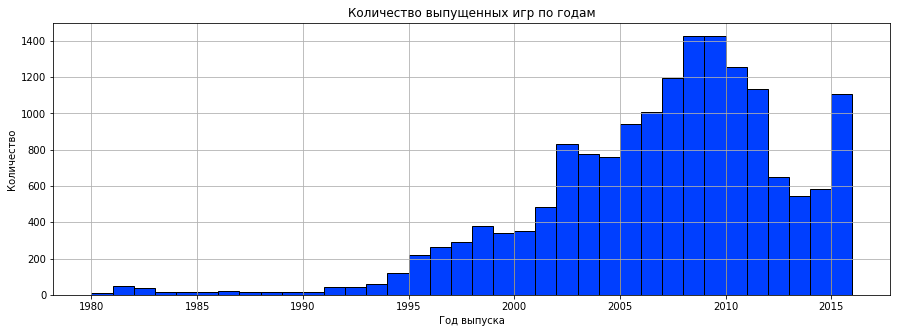

In [30]:
df['year_of_release'].plot(kind='hist', 
                           figsize = (15, 5), 
                           grid=True, 
                           bins=36, 
                           title='Количество выпущенных игр по годам', 
                           ec='black');
plt.xlabel('Год выпуска'), plt.ylabel('Количество')
plt.show()

До 1994 года новых игр практически не было. Резкий скачок по количеству игр - в 2002 году. Пик - 2008-2009 года. После этого начался спад, возможно связанный с ростом популярности мобильных телефонов.

### Исследование продаж по платформам

#### Как менялись продажи по платформам. Выберием платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

<AxesSubplot:ylabel='platform'>

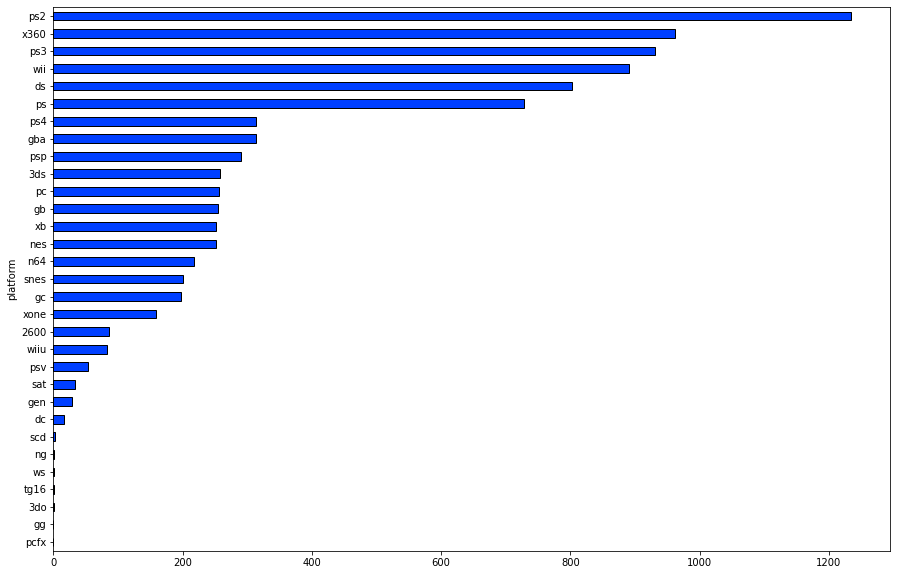

In [31]:
platform_group_by_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending = True)
platform_group_by_sales.plot(kind='barh', 
                             y='total_sales', 
                             figsize=(15,10), 
                             ec='black')

Визуально лидреами являются первые шесть платформ. Посторим дя них график распределения суммарных продаж по годам.

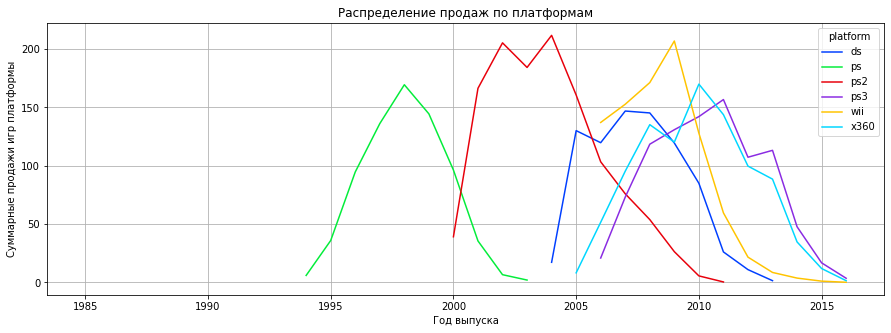

In [32]:
best_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index().head(6)
best_platforms_names = best_platforms['platform'].unique()
top_platforms = df[df['platform'].isin(best_platforms_names)]

fig, ax = plt.subplots(figsize=(15,5))
pd.pivot_table(top_platforms, 
               index = 'year_of_release', 
               columns='platform', 
               values='total_sales', 
               aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи игр платформы')
plt.title('Распределение продаж по платформам')
ax.grid(True)

- Платформы до 1994 не попали в топ-6 платформ по продажам игр.
- За срок примерно 10 лет проходит жизненный  цикл платформы: появляется, проходит пик продаж, исчезает.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.

Определим период данных, который поможет построить прогноз на 2017 год, учитывая результаты полученные в пункте 3.2.1.

По графику Распределения продаж по 6-ти самым популярным платформам можно сделать вывод, что:

-  не стоит брать период более 10 лет;
- с 2009 до 2011 есть спад продаж игр;
- 3 из 6 платформ с наибольшими продажами игр находятся в периоде с 2014 по 2016.

Примем за актуальный период, который поможет построить прогноз на 2017 год: 2014-2016.
Это период со стабильнымы продажами игр, и содержит информацию по 3 платформам с наибольшими суммарными продажами.

In [33]:
actual_period = df.query('year_of_release > 2013')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Text(0.5, 1.0, 'Распределение продаж по платформам')

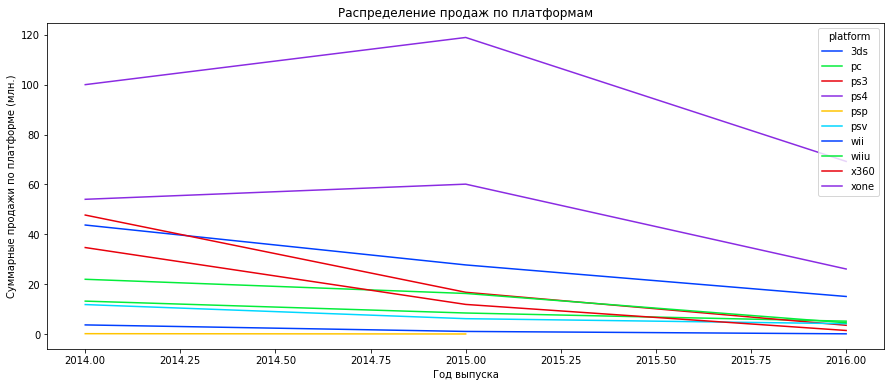

In [34]:
fig, ax = plt.subplots(figsize=(15,6))
pd.pivot_table(actual_period, 
               index = 'year_of_release', 
               columns='platform', 
               values ='total_sales', 
               aggfunc='sum').plot(ax=ax);
plt.xlabel('Год выпуска'), plt.ylabel('Суммарные продажи по платформе (млн.)')
plt.title('Распределение продаж по платформам')

Посмотрим на график суммарных продаж каждой платформы:

1. PSP не имеет продаж начиная после 2015. У данной платформы спад.
2. X360 и PS3 имеют значительные продажи в 2014 (почти 35 млн и 50 млн соответственно), но стремительно падают вниз, по причине выхода новых версий платформ: XOne и PS4.
3. XOne и PS4 c 2014 растут, имеют пик в 2015. Далее продажи идут на спад.
4. Cпадающий график у платформ: 3DS, PSV, WiiU,  Wii, PC. 

Заметно преобладание нескольких платформ на рынке - это XOne и PS4. К 2016 продажи игр на всех платфомах идет на спад, это может быть по какой-либо причине в мире (по этому вопросу следует лучше изучить игровую индустрию) или выбросы. Рассмотрим 2 вариант: построим графики «ящик с усами» и проанализируем данные на наличие выбросов.

За потенциально прибыльные платформы берем - XOne и PS4.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [35]:
best_platforms_actual_period = actual_period.groupby('platform')['total_sales']\
                                            .sum().sort_values(ascending = False)\
                                            .reset_index().head(6)
best_platforms_names_act_per = best_platforms_actual_period['platform'].unique()
top_platforms_actual_period = df[df['platform'].isin(best_platforms_names_act_per)]
print(best_platforms_actual_period['platform'].unique())

['ps4' 'xone' '3ds' 'ps3' 'x360' 'wiiu']


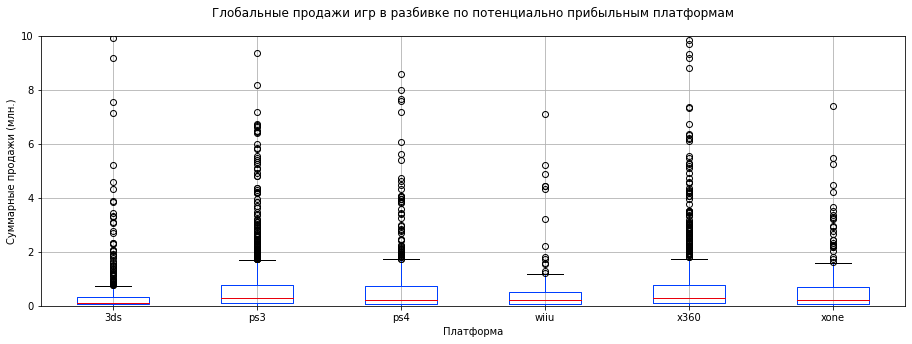

In [36]:
top_platforms_actual_period.boxplot('total_sales', by='platform', figsize=(15, 5))
plt.suptitle('Глобальные продажи игр в разбивке по потенциально прибыльным платформам')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Суммарные продажи (млн.)')
plt.ylim(0, 10)
plt.show()

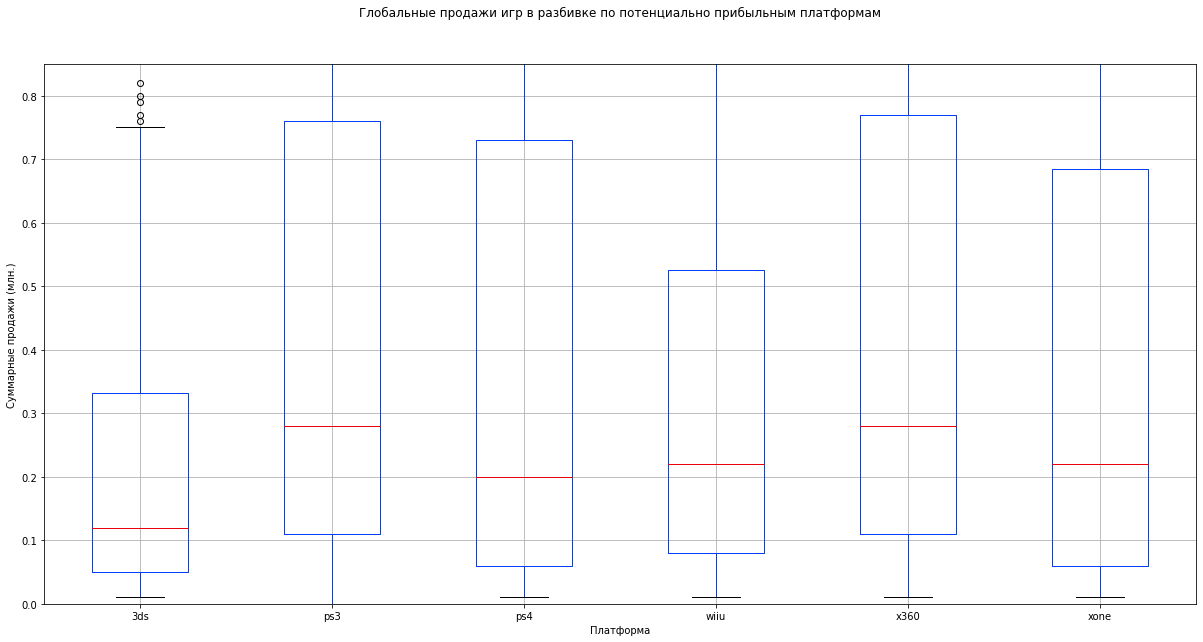

In [37]:
top_platforms_actual_period.boxplot('total_sales', by='platform', figsize=(20, 10))
plt.suptitle('Глобальные продажи игр в разбивке по потенциально прибыльным платформам')
plt.title(None);
plt.xlabel('Платформа'), plt.ylabel('Суммарные продажи (млн.)')
plt.ylim(0, 0.85)
plt.show()

Медиана по топовым платформам варьируется от 0,1 до 0,28 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 1 до 1,5 миллионов долларов.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

Рассмотрим влияние отзывов пользователей и критиков на продажи игр платформы X360.

In [38]:
score_for_sales_x360 = actual_period[actual_period['platform'] == 'x360']

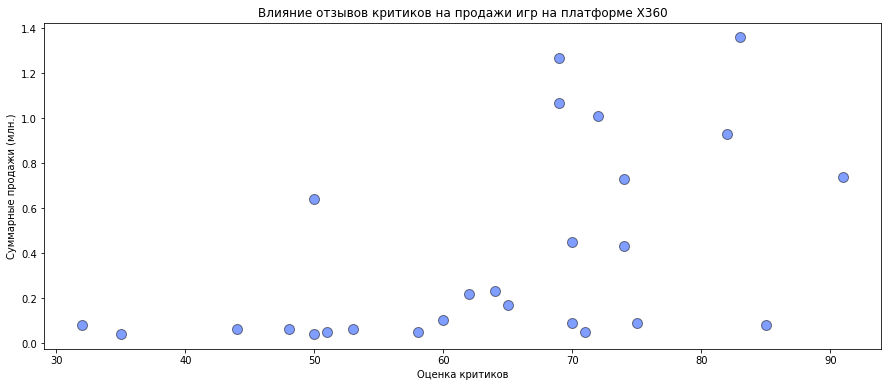

In [39]:
score_for_sales_x360.plot(x='critic_score', 
                          y='total_sales', 
                          kind='scatter', 
                          ec='black', 
                          figsize=(15,6), 
                          alpha=0.5, 
                          s = 100);
plt.ylabel('Суммарные продажи (млн.)'), 
plt.xlabel('Оценка критиков'), 
plt.title('Влияние отзывов критиков на продажи игр на платформе X360');

Text(0.5, 1.0, 'Влияние отзывов пользователей на продажи игр на платформе X360')

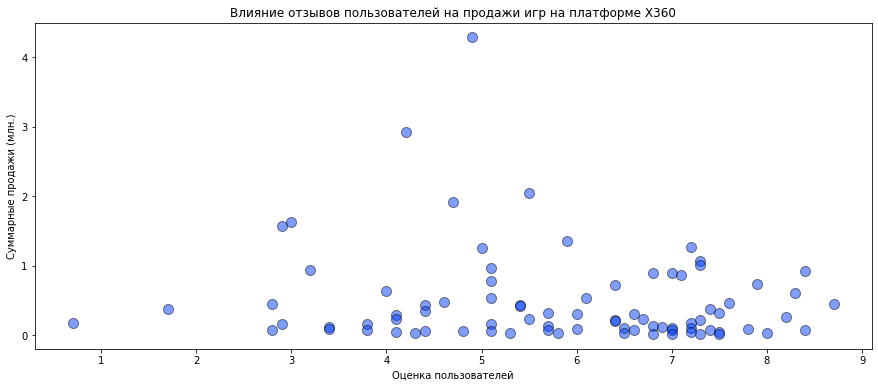

In [40]:
score_for_sales_x360.plot(x='user_score', 
                          y='total_sales', 
                          kind='scatter', 
                          ec='black', 
                          figsize=(15,6), 
                          alpha=0.5, 
                          s = 100);
plt.ylabel('Суммарные продажи (млн.)'), 
plt.xlabel('Оценка пользователей'), 
plt.title('Влияние отзывов пользователей на продажи игр на платформе X360')

In [41]:
x360_corr = score_for_sales_x360.pivot_table(index='name', 
            values=['total_sales', 'critic_score', 'user_score'])
x360_corr.corr() 

,critic_score,total_sales,user_score
critic_score,1.000000,0.525723,0.625309
total_sales,0.525723,1.000000,-0.138445
user_score,0.625309,-0.138445,1.000000


1. По графику зависимости продаж от оценки критиков можно сделать вывод, что чем выше оценка, тем больше продаж. Но корреляция в 0,39 - слабая. 
2. По графику зависимости продаж от оценки пользователей сложнее сделать такой же вывод, т.к. больше выбросов. Корреляция равна 0.04 - т.е. зависимость практически отсутствует.

Построим аналогичные диаграммы рассеяния для  популярных платформ в актуальный период.

In [42]:
#создадим функцию для построения диаграмм
def plot_scatter(data, platform_name):
    data1 = data[data['critic_score'].isna() == False]
    if (not data1.empty):
        data1.plot(x='critic_score', 
                   y='total_sales', 
                   kind='scatter', 
                   figsize=(5, 3));
        plt.ylabel('Суммарные продажи (млн.)'), 
        plt.xlabel('Оценка критиков'), 
        plt.title('Зависимость отзывов критиков на продажи игр на платформе ' + data1['platform'].unique());
        plt.show()
        
    
    data2 = data[data['user_score'].isna() == False]
    if (not data2.empty):
        data2.plot(y='total_sales', 
                   x='user_score', 
                   kind='scatter', 
                   figsize=(5, 3));
        plt.ylabel('Суммарные продажи (млн.)'), 
        plt.xlabel('Оценка пользователей'), 
        plt.title('Зависимость отзывов пользователей на продажи игр на платформе ' + data2['platform'].unique());
        plt.show()
        


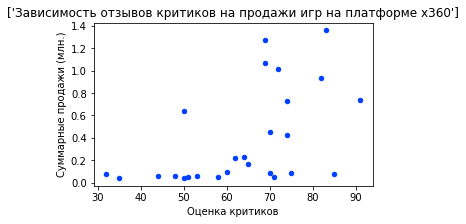

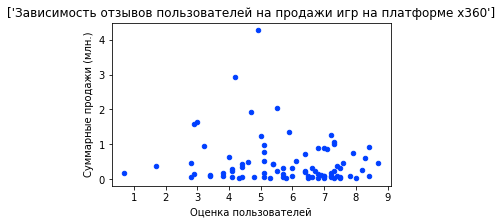

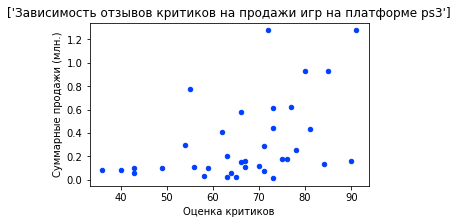

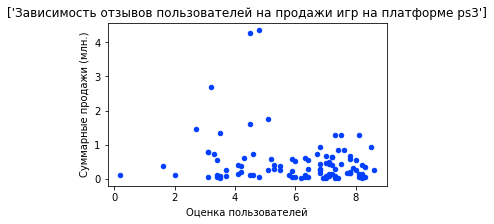

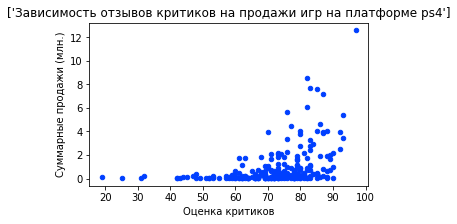

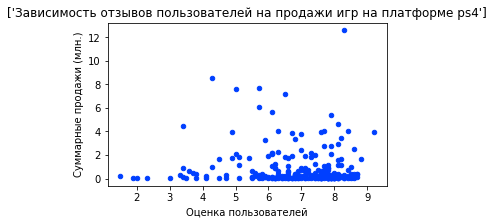

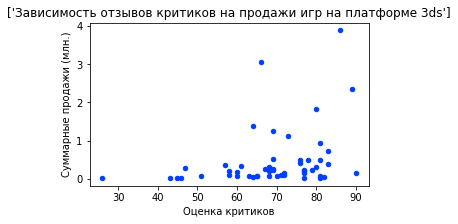

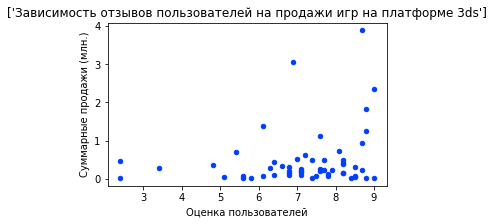

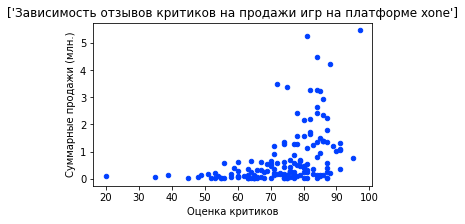

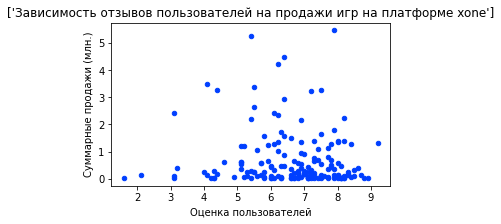

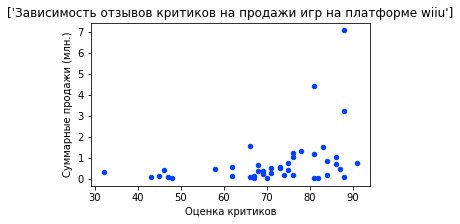

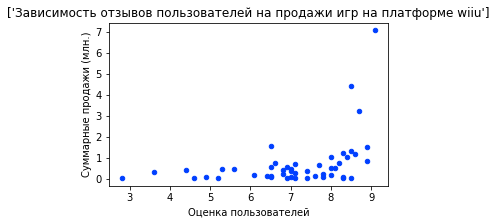

In [43]:
for platform_name in top_platforms_actual_period['platform'].unique():
    data = actual_period[actual_period['platform'] == platform_name]
    plot_scatter(data, platform_name) 

При изучении диаграмм рассеяния других платформ заметно, что о выводы сделанные при анализе одной платформы (X360) характерны и для всех платформ в целом. Ярко выраженной взаимосвязи между отзывами и продажами нет.

In [44]:
#actual_period.plot(x='user_score', y='total_sales', kind='scatter', ec='black', figsize=(15,6), alpha=0.5, s = 100);
#plt.ylabel('Суммарные продажи (млн.)'), plt.xlabel('Оценка пользователей'), plt.title('Влияние отзывов пользователей на продажи игр на всех платофрмах с 2011 по 2016');

In [45]:
#actual_period_corr = actual_period.pivot_table(index='name', values=['total_sales', 'critic_score', 'user_score'])
#actual_period_corr.corr() 

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

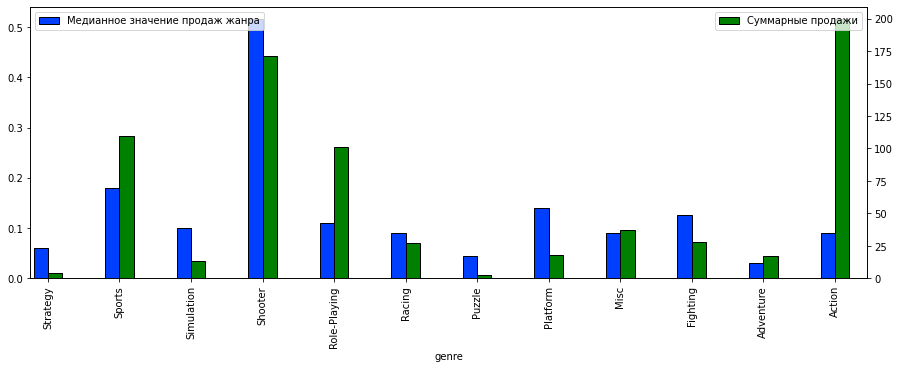

In [46]:
ax = plt.gca()
ax1 = ax.twinx()

pivot = actual_period.groupby('genre').agg({'total_sales':  'median'})\
                                    .sort_values(by='genre', ascending=False)

plot1 = pivot['total_sales']
plot1.plot(kind='bar', 
           figsize=(15,5),
           ec='black', 
           ax=ax, 
           width=0.2, 
           position=1)

pivot2 = actual_period.groupby('genre').agg({'total_sales':  'sum'})\
                                        .sort_values(by='genre', ascending=False)

plot2 = pivot2['total_sales']
plot2.plot(kind='bar', 
           figsize=(15,5), 
           ec='black', 
           ax=ax1,
           width=0.2, 
           color='green', 
           position=0)

ax.legend(['Медианное значение продаж жанра'], loc = 'upper left')
ax1.legend(['Суммарные продажи'], loc = 'upper right') 

Наибольшее число проданных копий в жанре  Action. Но медианное значение проданных копий игры больше всего у жанра Shooter.
Значит игры жанра Shooter стабильно приносят высокий доход.

Самое меньшее медианное значение продаж у  жанра  Adventure.

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (*NA, EU, JP*):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

Создадим функцию для построения диаграммы для определенного региона. 

In [47]:
def plot_top5_in_region(groupby, region_sales, ax):
    pivot = actual_period.groupby(groupby)\
                         .agg({region_sales: 'sum'})\
                         .sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Продажи в Северной Америке(NA)',
                  'eu_sales': 'Прдажи в Европе(EU)',
                  'jp_sales': 'Продажи в Японии (JP)'}
    color_dict = {'na_sales': 'blue',
                  'eu_sales': 'purple',
                  'jp_sales': 'green'}
    plot = pivot.plot(kind='bar', 
                      ec='black', 
                      title=title_dict[region_sales], 
                      ax=axes[ax], 
                      fontsize=18, 
                      color=color_dict[region_sales], 
                      rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)


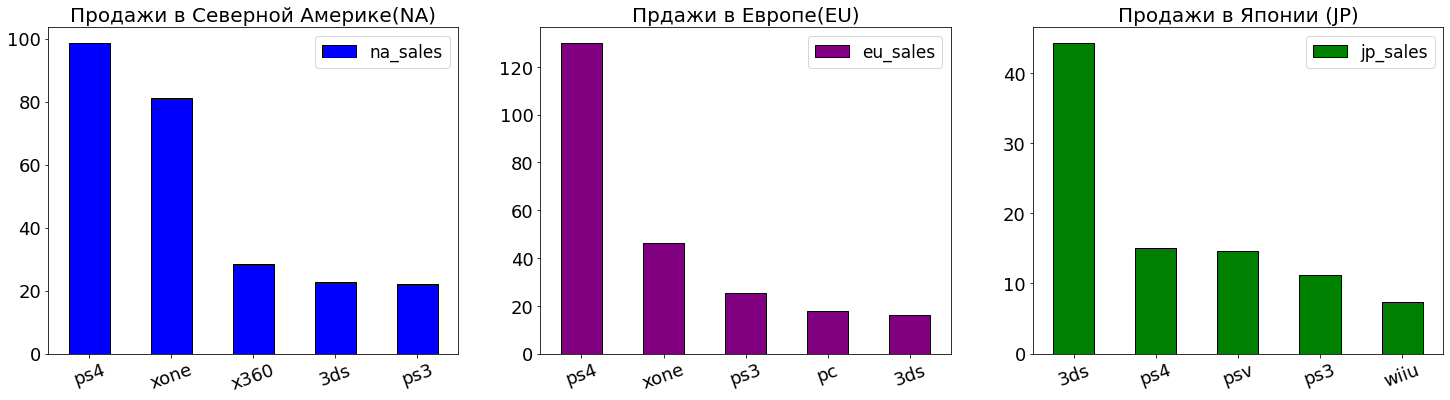

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_top5_in_region('platform', 'na_sales', 0)
plot_top5_in_region('platform', 'eu_sales', 1)
plot_top5_in_region('platform', 'jp_sales', 2)

Посмотрим доли продаж пяти популярных платформ в каждом регионе.

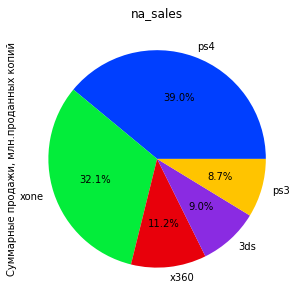

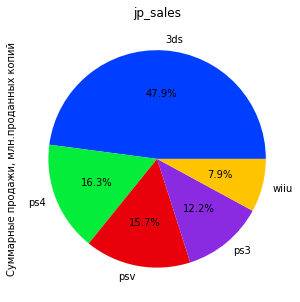

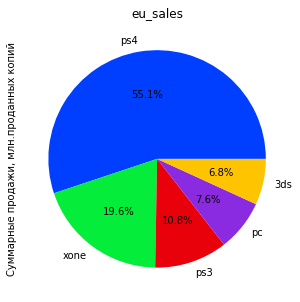

In [49]:
for region in {'na_sales', 'eu_sales', 'jp_sales'}:
    (actual_period.pivot_table(index='platform', 
                               values=region, 
                               aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, 
                      figsize=(5, 5), legend=False, 
                      title = region, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
    plt.show()

У жителей рассматриваемых регионов разные предпочтения в выборе платформ. Самая популярная в Северной Америке - PS4, В Европе - PS4, в Японии - 3DS.

### Самые популярные жанры (топ-5)

Построим даграммы пяти популярных жанров для каждого региона.

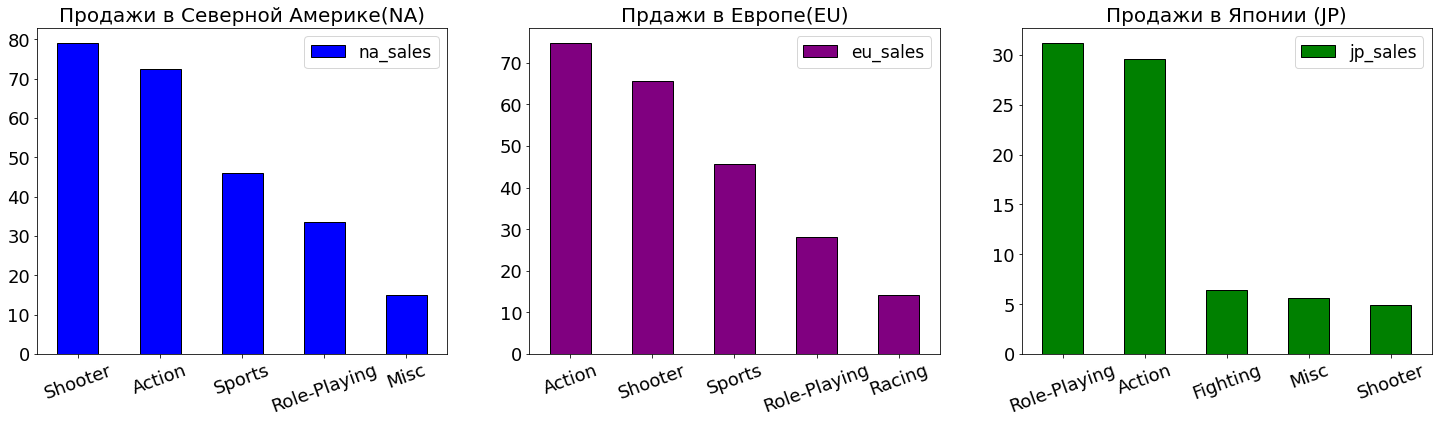

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_top5_in_region('genre', 'na_sales', 0)
plot_top5_in_region('genre', 'eu_sales', 1)
plot_top5_in_region('genre', 'jp_sales', 2)

Вкусы в Северной Америке и Европе схожи: топ-4 одинаковые - Action, Shooter, Sports, RPG. В Северной Америке больше играют в аркады (Misc), в Европе же чаще выбирают гонки (Racing).


В Японии вкус совершенно иной - на первом месте ролевые игры (RPG). Далее жанры Action, аркады (Misc), Fighting, Platform.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [51]:
#для учета игр без рейтинга заменим nan на строковое значение
actual_period['rating'] = actual_period['rating'].fillna('no_rating')
actual_period['rating'].unique()

/tmp/ipykernel_182/1795964444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_period['rating'] = actual_period['rating'].fillna('no_rating')


array(['no_rating', 'M', 'E', 'T', 'E10+'], dtype=object)

In [52]:
#ESRB_description = ['> 17 лет', np.nan, 'Для всех', '>10 лет', '13-19 лет', 'Для детей младшего возраста', 'Рейтинг не установлен']
#ESRB_description = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'RP': 'Рейтинг не установлен', 'EC': 'Для детей младшего возраста' }

In [53]:
#actual_period['rating'] = actual_period['rating'].replace(ESRB_rating, ESRB_description)
#actual_period['ESRB_description'] = actual_period['rating'].map(ESRB_description)№

In [54]:
actual_period.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_and_platform
31,call of duty: black ops 3,ps4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63,call of duty: black ops 3 ps4
42,grand theft auto v,ps4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,grand theft auto v ps4
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68,pokemon omega ruby/pokemon alpha sapphire 3ds
77,fifa 16,ps4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,fifa 16 ps4
87,star wars battlefront (2015),ps4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98,star wars battlefront (2015) ps4
92,call of duty: advanced warfare,ps4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,call of duty: advanced warfare ps4
94,fifa 17,ps4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,fifa 17 ps4
96,super smash bros. for wii u and 3ds,3ds,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,no_rating,7.55,super smash bros. for wii u and 3ds 3ds
99,call of duty: black ops 3,xone,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,no_rating,7.39,call of duty: black ops 3 xone
105,fallout 4,ps4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,fallout 4 ps4


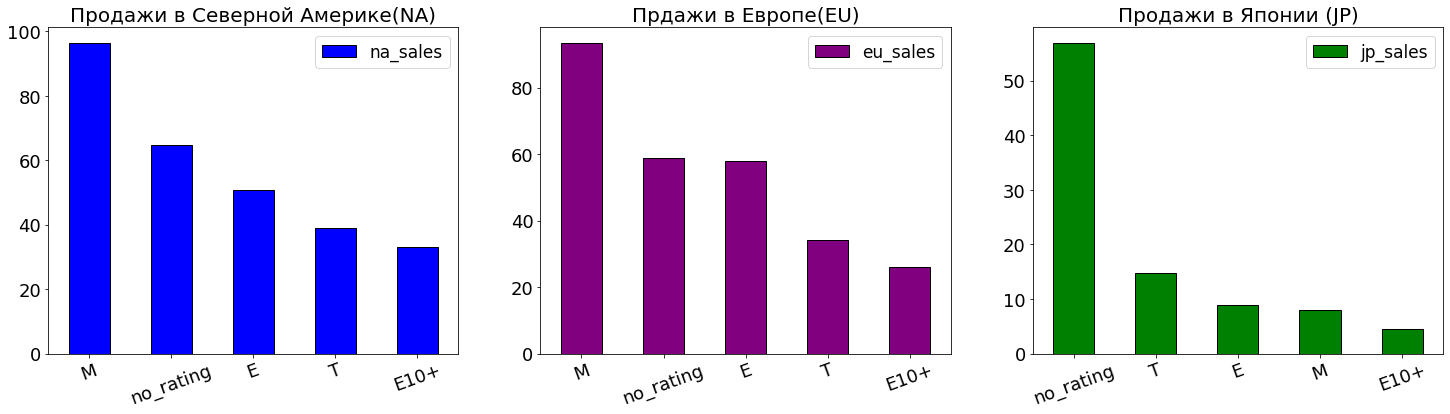

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
plot_top5_in_region('rating', 'na_sales', 0)
plot_top5_in_region('rating', 'eu_sales', 1)
plot_top5_in_region('rating', 'jp_sales', 2)

В Северной Америке и Европе наибольшее количество проданных копий у игр с рейтингом `M` (`> 17 лет`). Что логично вытекает из популярных жанров, т.к. игры жанров Shooter и Action редко могут быть разрешены детям.

В Японии преобладают игры без рейтинга, далее идет рейтинг  `T` (`13-19 лет`). Возможно причина того, что лидеры продаж в Японии - игры без рейтинга в том, что в Японии рейтинг контента не требуется по закону и есть свои категории контента.

#### Вывод

Портреты пользователей из каждого региона:

Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами XOne и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом `M` (`> 17 лет`).

Средне-статистический пользователь из Европы предпочитает платформы XOne и PS4, жанры "Action" и "Shoter" и игры с рейтингом `M` (`> 17 лет`).

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", играм без рейтинга ESRB.

## Проверка гипотез

- Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;
- Средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение *alpha*.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Н0 (нулевая гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Критический уровень статистической значимости  примем в 5%.

In [56]:
xbox_one_ratings = actual_period[(actual_period['platform'] == 'xone') \
                                 & (actual_period['user_score'] > 0)]['user_score']
pc_ratings = actual_period[(actual_period['platform'] == 'pc') \
                           & (actual_period['user_score'] > 0)]['user_score']

In [57]:
alpha = .05 # критический уровень статистической значимости

results = ttest_ind(
    xbox_one_ratings,
    pc_ratings,
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги платформ Xbox One и PC различаются!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!


In [58]:
# сравним средние оценки
print('{:} {: >.2f} '.format("Средний пользовательский рейтинг платформ Xbox One:", xbox_one_ratings.mean() ))
print('{:} {: >.2f} '.format("Средний пользовательский рейтинг платформ PC:",pc_ratings.mean() ))

Средний пользовательский рейтинг платформ Xbox One: 6.59 
Средний пользовательский рейтинг платформ PC: 6.30 


#### Вывод
Средние пользовательские рейтинги платформ Xbox One и PC статистически одинаковы! 

Из "ручного" сравнения видно, что cредние пользовательские рейтинги платформ Xbox One и PC действительно очень близки по своим значениям. У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Н0 (нулевая гипотеза)** - средние пользовательские рейтинги жанров **Action** и **Sports** одинаковые.

**Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги жанров **Action** и **Sports** отличаются между собой.

Критический уровень статистической значимости  примем в 5%.

In [59]:
action_ratings = actual_period[(actual_period['genre'] == 'Action') \
                               & (actual_period['user_score'] > 0)]['user_score']
sports_ratings = actual_period[(actual_period['genre'] == 'Sports') \
                               & (actual_period['user_score'] > 0)]['user_score']

In [60]:
alpha = .05 # критический уровень статистической значимости

results = ttest_ind(
    action_ratings,
    sports_ratings,
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги  жанров Action и Sports отличаются между собой!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги  жанров Action и Sports одинаковы!")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги  жанров Action и Sports отличаются между собой!


In [61]:
# сравним средние оценки
print('{:} {: >.2f} '.format("Средний пользовательский рейтинг жанра Action:", action_ratings.mean() ))
print('{:} {: >.2f} '.format("Средний пользовательский рейтинг жанра Sports:",sports_ratings.mean() ))

Средний пользовательский рейтинг жанра Action: 6.76 
Средний пользовательский рейтинг жанра Sports: 5.23 


###### Вывод
Средние пользовательские рейтинги жанров Action и Sports разные! Вероятность случайно получить такое отличие крайне мала.
Из "ручного" сравнения видно, что cредние пользовательские рейтинги жанров Action и Sports действительно разные.

## Вывод

Основные выводы по проделанной работе:

 - Цикл жизни платформы - 10 лет, раз в пять лет происходит смена платформы лидера. Сейчас (в конце 2016) максимально привлекательными выглядят следующие платформы: `PS4` и `Xbox one`.

- `action` - имеет самое большое число проданных копий, но игры в жанре `shooter` продаются стабильнее. Также популярны  `sports`, `RPG`.
- если оценивать рынки с точки зрения популярности платформ (доля продаж в регионе), то
    - Северная Америка: `PS4`, `Xone`, `X360`;
    - Европа: `PS4`, `Xone` `PS3`;
    - Япония: `3ds`, `PS4`,`PSV`;
- если оценивать рынки с точки зрения популярности жанров (доля продаж в регионе), то:
    - Северная Америка: `action`, `sports`, `shooter`;
    - Европа: `action`, `sports`, `shooter`;
    - Япония: `role-playing`, `action`, `misc`;
- популярность игр в зависимости от рейтинга ESRB:
    - Северная Америка:  `M` (`> 17 лет`), игры без рейтинга ESRB, `E` (`Для всех`);
    - Европа: `M` (`> 17 лет`), игры без рейтинга ESRB, `E` (`Для всех`;
    - Япония: игры без рейтинга ESRB, `T` (`13-19 лет`), `E` (`Для всех`);

Главный вопрос всего проекта: нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

Рекомендации для планирования рекламных кампаний по итогам проекта:

1. нужно делать ставку на игры для приставок. Сейчас поплуярность набирают `PS4` и `Xbox one`.
2. обязательно стоит учесть региональные предпочтения к платформам и жанрам. Как было показано выше рынки США и Европы очень похожи, а вот Япония отличается.
3. для потенциального увеличения продаж лучше всего рекламировать игры с рейтингом `M` (`> 17 лет`), `E` (`Для всех`), `T` (`13-19 лет`).